##  Classification Problem

## IoT Botnet ("robot" and "network,") Attack Detection problem

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("iot_static_data.csv")
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,...,0.468843,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,Provision PT 838 Security Camera,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,...,0.000000,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,Provision PT 737E Security Camera,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,...,0.000000,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,Samsung SNH 1011 N Webcam,BENIGN
3,1.000000,60.000018,0.004849,1.000065,60.017569,4.743299,1.063813,76.195918,4110.590208,2.936177,...,0.000000,7.290294,60.000000,9.540000e-07,84.852814,1.290000e-12,8.690000e-30,9.560000e-18,SimpleHome XCS7 1002 WHT Security Camera,BENIGN
4,100.707918,226.708372,54562.182272,155.736482,252.269792,58012.457557,446.854937,301.030305,60959.734097,4257.526218,...,0.000000,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,Provision PT 838 Security Camera,mirai_udp_attack


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 117 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(2)
memory usage: 22.9+ MB


In [4]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,25609.000000,25609.000000,2.560900e+04,25609.000000,25609.000000,2.560900e+04,25609.000000,25609.000000,25609.000000,25609.000000,...,2.560900e+04,2.560900e+04,2.560900e+04,25609.000000,25609.000000,2.560900e+04,25609.000000,2.560900e+04,2.560900e+04,25609.000000
mean,16.458215,138.570936,7.768559e+03,24.703832,138.614095,8.279129e+03,64.260234,139.362935,9213.286937,555.191870,...,9.737206e+03,8.883111e+02,1.836737e-02,15.419695,138.774908,2.331401e+01,181.843879,1.152385e+04,8.871102e+02,0.028415
std,41.087239,129.673709,2.668021e+04,64.930734,126.663855,2.694292e+04,183.925917,122.343522,26326.030024,1694.895744,...,4.675494e+04,6.214110e+03,1.686189e-01,273.481167,140.555584,6.441393e+01,166.863690,4.927406e+04,7.054763e+03,0.184214
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-8.584038e+04,-1.551473e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-1.812996e+05,-1.692781
25%,1.000001,66.000000,9.090000e-13,1.000236,66.000000,1.770000e-09,1.128262,66.043013,0.098128,3.430610,...,4.550000e-13,-2.150000e-19,-2.770000e-17,2.999914,66.021257,6.740000e-07,84.852814,9.090000e-13,-2.530000e-29,0.000000
50%,1.594794,81.663628,6.869070e-04,1.819242,81.747426,2.517763e-01,2.026690,84.299338,41.591685,8.311976,...,2.590000e-06,0.000000e+00,0.000000e+00,5.824137,75.000000,8.972650e-02,115.133698,1.600000e+01,0.000000e+00,0.000000
75%,2.999965,148.752850,1.814097e+02,3.139729,150.499727,3.631427e+02,4.005944,147.252315,1930.709057,12.569276,...,2.234147e+02,1.130000e-38,0.000000e+00,17.515348,102.000000,9.846490e+00,144.249783,2.521173e+02,5.000000e-06,0.000016
max,349.606606,1451.207170,4.888213e+05,516.761693,1448.606519,4.731581e+05,1090.951084,1433.998154,457995.701700,8903.129283,...,4.721643e+05,1.309683e+05,2.669061e+00,25682.418417,1470.000000,6.810012e+02,1470.000000,4.795595e+05,1.311862e+05,2.721607


In [5]:
df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
Source                   0
Class                    0
Length: 117, dtype: int64

In [6]:
## function to get Dimensions ,Shape, Total NA values and Distinct Values

def list_na_values(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [7]:
list_na_values(df)

Dimensions : 25609 rows, 117 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                      MI_dir_L5_weight    float64        18246          0
                        MI_dir_L5_mean    float64        13695          0
                    MI_dir_L5_variance    float64        15566          0
                      MI_dir_L3_weight    float64        20955          0
                        MI_dir_L3_mean    float64        16953          0
                    MI_dir_L3_variance    float64        18577          0
                      MI_dir_L1_weight    float64        23190          0
                        MI_dir_L1_mean    float64        22531          0
                    MI_dir_L1_variance    float64        23618          0
                    MI_dir_L0.1_weight    float64        24583          0
                      MI_dir_L0.1_mean    float64        24401          0
                  MI_dir_L0.1_variance    float64   

In [8]:
df["Class"].value_counts()

BENIGN                   22287
mirai_udp_attack          1774
gafgyt_udp_attack          446
gafgyt_junk_attack         377
gafgyt_tcp_attack          213
gafgyt_scan_attack         200
mirai_syn_attack           101
mirai_ack_attack            96
mirai_scan_attack           86
gafgyt_combo_attack         18
mirai_udpplain_attack       11
Name: Class, dtype: int64

In [9]:
df["Class"].unique()

array(['BENIGN', 'mirai_udp_attack', 'mirai_ack_attack',
       'gafgyt_scan_attack', 'mirai_scan_attack', 'gafgyt_tcp_attack',
       'gafgyt_udp_attack', 'gafgyt_junk_attack', 'gafgyt_combo_attack',
       'mirai_syn_attack', 'mirai_udpplain_attack'], dtype=object)

In [10]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['Source', 'Class']

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df["Class"])
df["Source"].unique()

array(['Provision PT 838 Security Camera',
       'Provision PT 737E Security Camera', 'Samsung SNH 1011 N Webcam',
       'SimpleHome XCS7 1002 WHT Security Camera',
       'Philips B120N10 Baby Monitor',
       'SimpleHome XCS7 1003 WHT Security Camera', 'Ennio Doorbell',
       'Danmini Doorbell', 'Ecobee Thermostat'], dtype=object)

In [12]:
df["Source"] = encoder.fit_transform(df["Source"])

In [13]:
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,...,0.468843,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,5,0
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,...,0.000000,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,4,0
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,...,0.000000,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,6,0
3,1.000000,60.000018,0.004849,1.000065,60.017569,4.743299,1.063813,76.195918,4110.590208,2.936177,...,0.000000,7.290294,60.000000,9.540000e-07,84.852814,1.290000e-12,8.690000e-30,9.560000e-18,7,0
4,100.707918,226.708372,54562.182272,155.736482,252.269792,58012.457557,446.854937,301.030305,60959.734097,4257.526218,...,0.000000,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,5,9


## RandomForestClassifier

In [14]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)

# create y label
y = df['Class']

# split into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# import model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(x_train, y_train)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)


0.9990888975660549

In [15]:
clf.score(x_train,y_train)

0.9997768604261966

In [16]:
clf.score(x_test,y_test)

0.9990888975660549

***Cross validation score***
        
        Model is trained on 5 different version of training data and evaluated on 5 different version of the test data.

In [17]:
from sklearn.model_selection import cross_val_score

cv_acc=np.mean(cross_val_score(clf,x,y,cv=5))  
print(f"The cross-validated score is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score is: 99.92%


***Using Scoring metrics "Accuracy"***




In [18]:

from sklearn.model_selection import cross_val_score
cv_acc_acc=np.mean(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))  
print(f"The cross-validated score accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score accuracy is: 99.92%


***Using Scoring metrics "precision"***

In [19]:
from sklearn.model_selection import cross_val_score
cv_acc_pre=np.mean(cross_val_score(clf,x,y,cv=5,scoring="precision"))  
print(f"The cross-validated score precision is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score precision is: 99.92%


***Using Scoring metrics "recall"***

In [20]:
from sklearn.model_selection import cross_val_score
cv_acc_pre=np.mean(cross_val_score(clf,x,y,cv=5,scoring="recall"))  
print(f"The cross-validated score recall is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score recall is: 99.92%


***Using Scoring metrics "f1 score"***

In [21]:
from sklearn.model_selection import cross_val_score
cv_acc_pre=np.mean(cross_val_score(clf,x,y,cv=5,scoring="f1"))  
print(f"The cross-validated score f1 is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score f1 is: 99.92%


In [22]:
# Accuracy classification score
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.9990888975660549

In [23]:
print('Model accuracy score with selected features : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_pred,y_test))

Model accuracy score with selected features : 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6637
           1       0.20      1.00      0.33         1
           2       1.00      0.97      0.98       117
           3       1.00      1.00      1.00        60
           4       0.98      1.00      0.99        62
           5       1.00      0.99      1.00       143
           6       0.97      0.97      0.97        35
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00       566
          10       0.67      1.00      0.80         2

    accuracy                           1.00      7683
   macro avg       0.89      0.99      0.92      7683
weighted avg       1.00      1.00      1.00      7683



***Improving model predictions through experimentation (hyperparameter tuning)***

In [24]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

***Scikit-Learn's RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!***
        
    3 different models on a small dataset.

    A baseline RandomForestClassifier (all default parameters)
    A RandomForestClassifier tuned with RandomizedSearchCV (and refit=True)
    A RandomForestClassifier tuned with GridSearchCV (and refit=True)

***Make evaluation function***

In [25]:
def evaluate_pred(y_true, y_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,pos_label='positive',average='micro')
    recall = recall_score(y_true, y_pred,pos_label='positive',average='micro')
    f1 = f1_score(y_true, y_pred,pos_label='positive',average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict



***A baseline RandomForestClassifier***

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
df = df.sample(frac=1)

# Split into X & y
x = df.drop("Class", axis=1)
y = df["Class"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(df)) # 70% of data
valid_split = round(train_split + 0.15 * len(df)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_valid)

# Evaluate the classifier
baseline_metrics = evaluate_pred(y_valid, y_pred)
baseline_metrics

Acc: 99.90%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

***RandomizedSearchCV***

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  10.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  10.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   9.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  11.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  10.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [28]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_pred(y_test, y_preds)


Acc: 99.92%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [29]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [30]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_pred(y_test, rs_y_preds)

Acc: 99.92%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


***GridSearchCV***

In [31]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [32]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [33]:
# Evaluate GridSearchCV model
gs_y_pred = gs_clf.predict(x_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_pred(y_test, gs_y_pred)

Acc: 99.95%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


***Compare metrics***

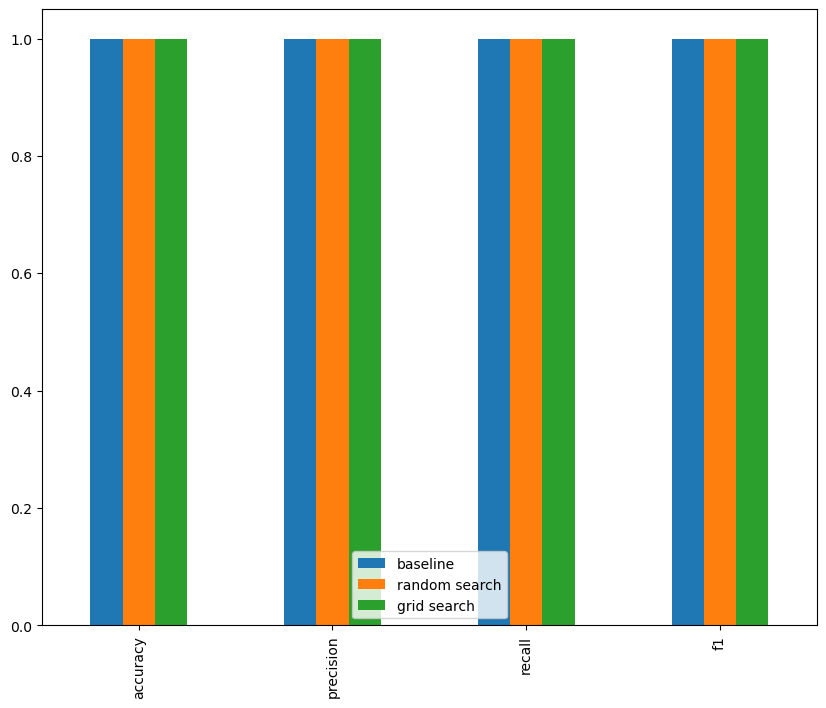

In [34]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## Support Vector Machines

In [35]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)

# create y label
y = df['Class']

# split into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# # import model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))


# fit the model to the training set

clf.fit(x_train, y_train)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)


0.9850318885851881

In [36]:
clf.score(x_train,y_train)

0.9839339506861542

In [37]:
clf.score(x_test,y_test)

0.9850318885851881

In [38]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9850318885851881

## SGDClassifier (Stochastic Gradient Descent)

In [39]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)
# create y label
y = df['Class']

from sklearn.model_selection import train_test_split

# split into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# import model
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)


# fit the model to the training set

clf.fit(x_train, y_train)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)


0.7844591956267083

In [40]:
clf.score(x_train,y_train)

0.7831307658515156

In [41]:
clf.score(x_test,y_test)

0.7844591956267083

In [42]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7844591956267083

## KNeighborsClassifier

In [43]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)
# create y label
y = df['Class']

from sklearn.model_selection import train_test_split

# split into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# import model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set

neigh.fit(x_train, y_train)

# Predict on the test set results

y_pred = neigh.predict(x_test)
np.mean(y_pred==y_test)


0.9673955486138227

In [44]:
neigh.score(x_train,y_train)

0.9792063259628057

In [45]:
neigh.score(x_test,y_test)

0.9673955486138227

In [46]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9673955486138227

## Kernel Approximation
## Radial Basis Function Kernel

In [47]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)
# create y label
y = df['Class']

from sklearn.model_selection import train_test_split

# split into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# import model
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
rbf_feature = RBFSampler(gamma=1, random_state=1)
x_features = rbf_feature.fit_transform(x_train)
clf = SGDClassifier(max_iter=5)


# fit the model to the training set

clf.fit(x_train, y_train)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)


0.6411557985162046

In [48]:
clf.score(x_train,y_train)

0.6465075413676966

In [49]:
clf.score(x_test,y_test)

0.6411557985162046

In [50]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6411557985162046

## Ensemble methods
## Bagging meta-estimator

In [51]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)
# create y label
y = df['Class']

from sklearn.model_selection import train_test_split

# split into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# import model
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)


# fit the model to the training set

model.fit(x_train, y_train)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)


0.6411557985162046

In [52]:
model.score(x_train,y_train)

0.9858446819934593

In [53]:
model.score(x_test,y_test)

0.9834049199531433

In [54]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6411557985162046

## LinearSVC

In [55]:
# Import algorithm
# split in to x and y

# create x label
x = df.drop(['Class'], axis=1)
# create y label
y = df['Class']

from sklearn.model_selection import train_test_split

# split into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# import model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
x_train, y_train = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))


# fit the model to the training set

clf.fit(x_train, y_train)
# Predict on the test set results
x_test, y_test = make_classification(n_features=4, random_state=0)

# Predict on the test set results

y_pred = clf.predict(x_test)
np.mean(y_pred==y_test)



0.93

In [56]:
clf.score(x_train,y_train)

0.93

In [57]:

clf.score(x_test,y_test)

0.93

In [58]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93